In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler

In [7]:
# Prepare the data
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
df["ID"] = df.index

In [8]:
# Calculate dissimilarity matrix using Manhattan distance
dissMat = squareform(pdist(df.drop(columns=["species", "ID"]), metric="cityblock"))


In [9]:
# Create an undirected graph from the dissimilarity matrix
undirected_graph = nx.from_numpy_matrix(dissMat)

In [10]:
# Compute minimum spanning tree using Prim's algorithm
mst_graph = nx.minimum_spanning_tree(undirected_graph, algorithm="prim")


In [11]:
# Create a layout for the graph
pos = nx.spring_layout(mst_graph)


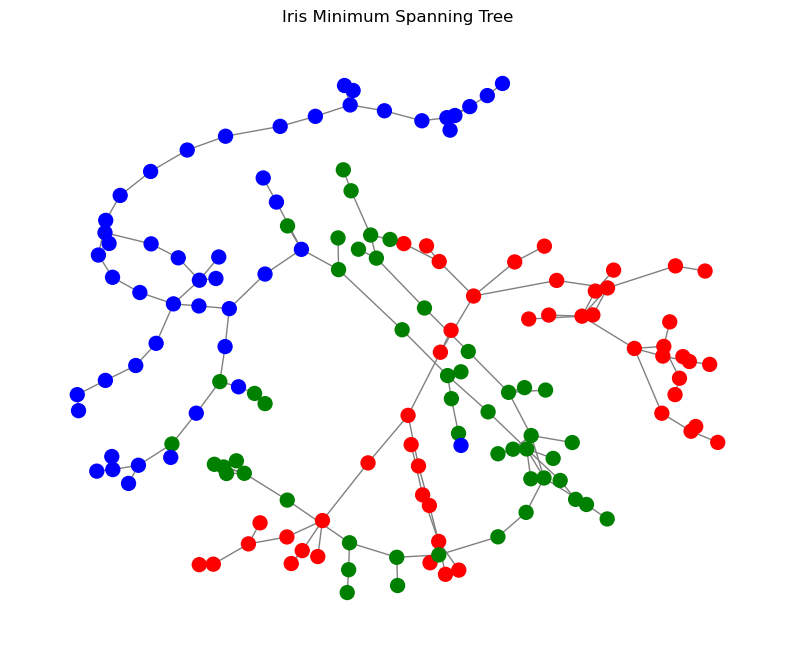

In [13]:
# Prepare data for plotting
node_list = list(mst_graph.nodes())
node_color = df.loc[node_list, "species"].map({"setosa": "red", "versicolor": "green", "virginica": "blue"})

# Plot the network with matplotlib
plt.figure(figsize=(10, 8))
nx.draw_networkx(mst_graph, pos, node_color=node_color, node_size=100, with_labels=False, edge_color="grey")
plt.title("Iris Minimum Spanning Tree")
plt.axis("off")
plt.show()